In [ ]:
# 1	cap-shape	شكل القبعة (bell, conical, convex, flat, knobbed, sunken)
# 2	cap-surface	سطح القبعة (fibrous, grooves, scaly, smooth)
# 3	cap-color	لون القبعة (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow)
# 4	bruises	هل يظهر كدمات عند اللمس؟ (bruises, no)
# 5	odor	الرائحة (almond, anise, creosote, fishy, foul, musty, none, pungent, spicy)
# 6	gill-attachment	كيفية التصاق الخياشيم بالعنق (attached, descending, free, notched)
# 7	gill-spacing	تباعد الخياشيم (close, crowded, distant)
# 8	gill-size	حجم الخياشيم (broad, narrow)
# 9	gill-color	لون الخياشيم (black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, yellow)
# 10	stalk-shape	شكل العنق (enlarging, tapering)
# 11	stalk-root	جذر العنق (bulbous, club, cup, equal, rhizomorphs, rooted, missing)
# 12	stalk-surface-above-ring	سطح العنق فوق الحلقة (fibrous, scaly, silky, smooth)
# 13	stalk-surface-below-ring	سطح العنق تحت الحلقة (مثل السابق)
# 14	stalk-color-above-ring	لون العنق فوق الحلقة
# 15	stalk-color-below-ring	لون العنق تحت الحلقة
# 16	veil-type	نوع الغشاء (partial) ← لا يتغير (نحذفه غالباً)
# 17	veil-color	لون الغشاء (brown, orange, white, yellow)
# 18	ring-number	عدد الحلقات (none, one, two)
# 19	ring-type	نوع الحلقة (cobwebby, evanescent, flaring, large, none, pendant, sheath, zone)
# 20	spore-print-color	لون طباعة الأبواغ (black, brown, buff, chocolate, green, orange, purple, white, yellow)
# 21	population	عدد السكان في البيئة (abundant, clustered, numerous, scattered, several, solitary)
# 22	habitat	نوع البيئة (grasses, leaves, meadows, paths, urban, waste, woods)

#  الهدف (Target):
# class

# e = edible (صالح للأكل)

# p = poisonous (سام)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df = pd.read_csv('/content/mushrooms.csv')

# عرض أول 5 صفوف
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
# حذف العمود veil-type لأنه يحتوي فقط على قيمة واحدة
#df.drop('veil-type', axis=1, inplace=True)
# عدد القيم المفقودة
print("Missing values:", (df == '?').sum())

# استبدال القيم المفقودة في stalk-root بالقيمة الأكثر تكراراً (mode)
most_frequent = df['stalk-root'].mode()[0]
df['stalk-root'] = df['stalk-root'].replace('?', most_frequent)

Missing values: class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [4]:
df['class'].value_counts()

,count
class,
e,4208
p,3916


In [5]:
# تشفير العمود الهدف (class): 'e' => 0, 'p' => 1
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

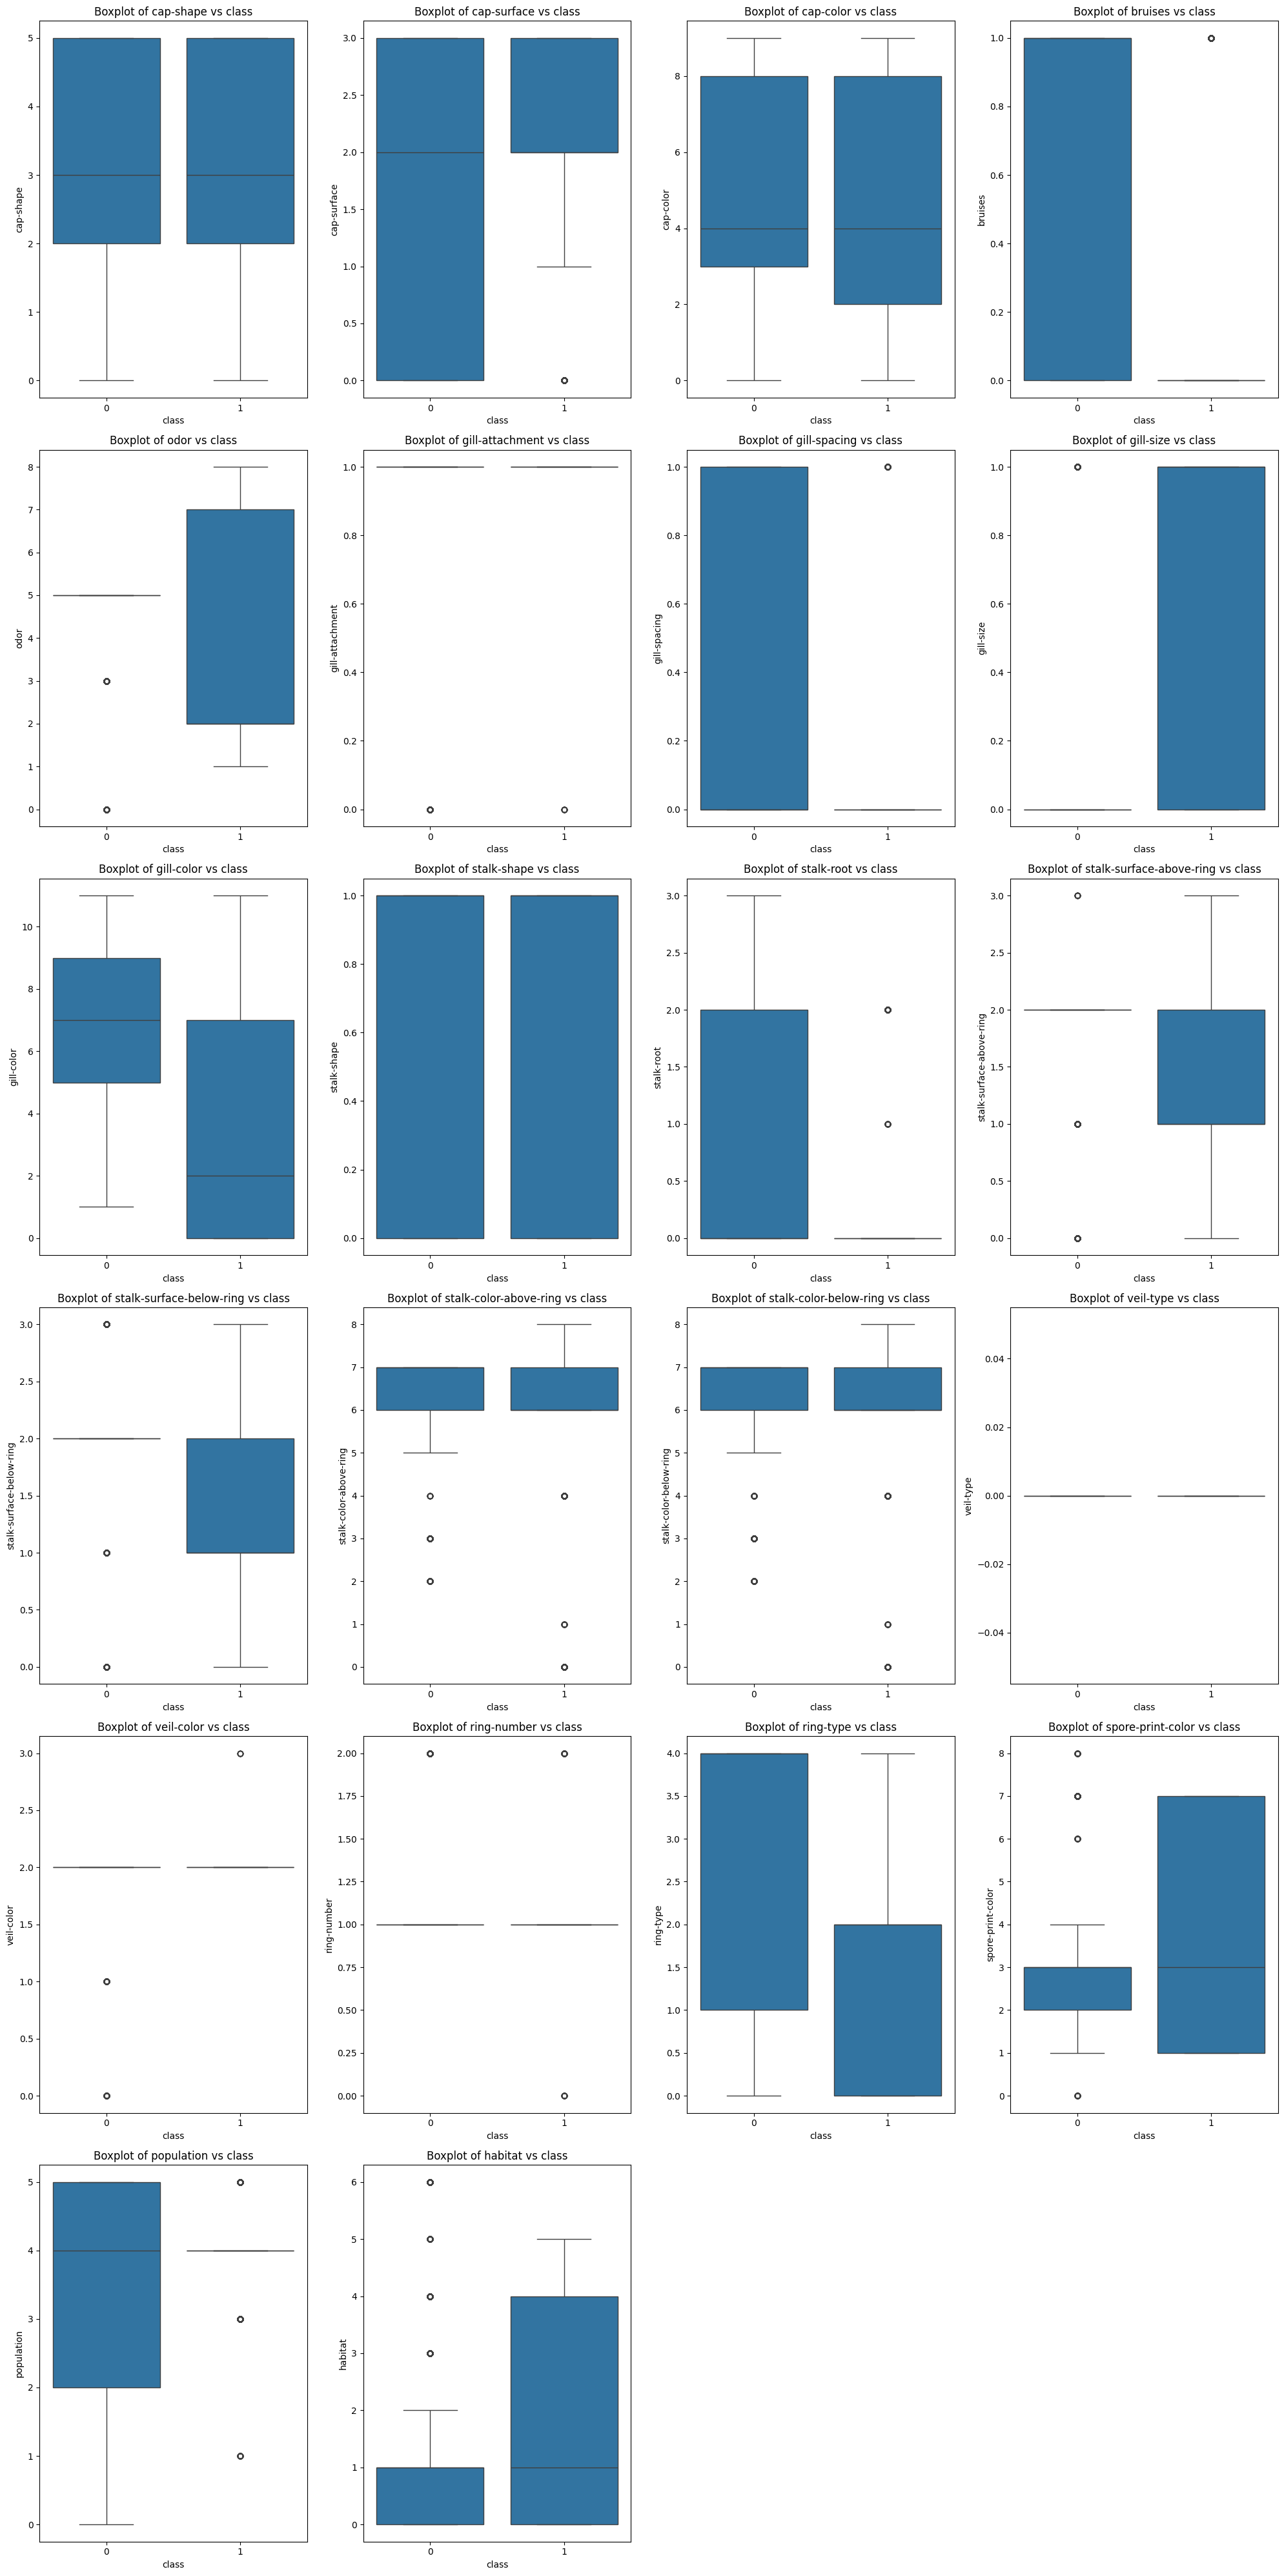

In [6]:
# نسخة من البيانات الأصلية
df_encoded = df.copy()

# ترميز كل الأعمدة التصنيفية إلى أرقام (باستثناء class لأنه مشفر بالفعل)
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

# رسم Boxplots لكل الأعمدة بالنسبة إلى class
plt.figure(figsize=(20, 40))
for i, column in enumerate(df_encoded.columns[1:]):  # تخطي 'class'
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x='class', y=column, data=df_encoded)
    plt.title(f'Boxplot of {column} vs class')

plt.tight_layout()
plt.show()

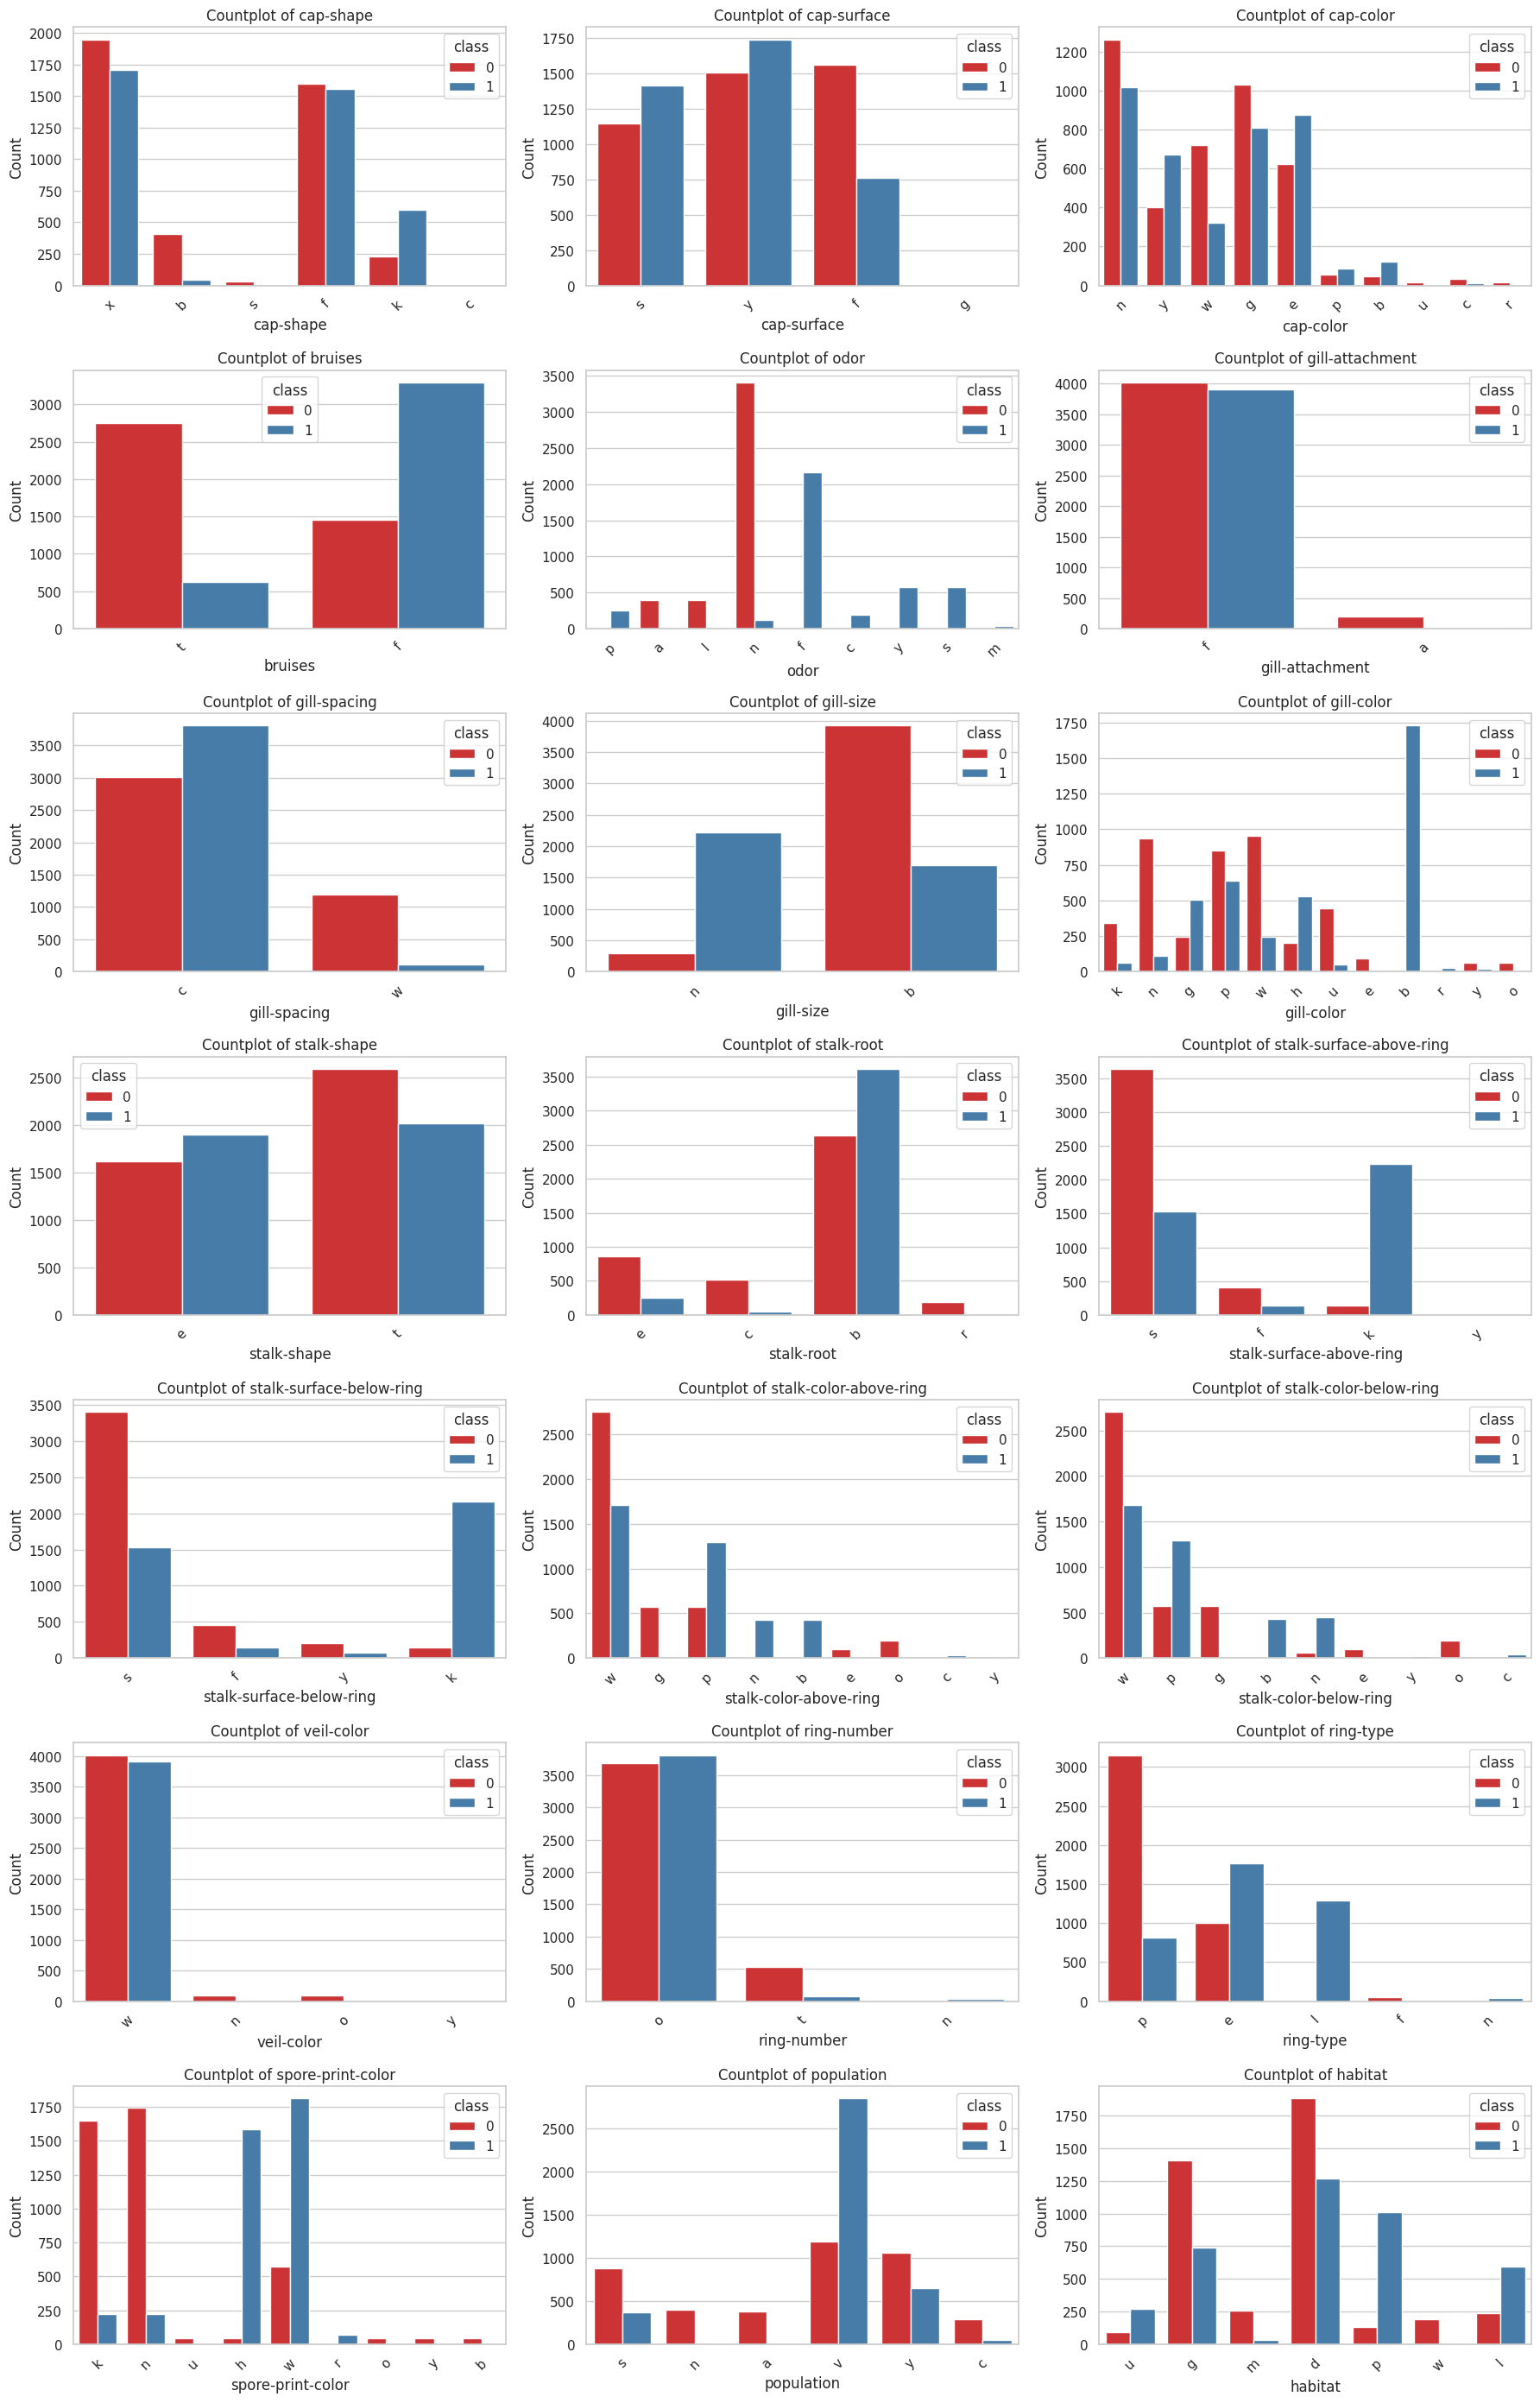

In [ ]:
sns.set(style="whitegrid")
categorical_columns = [col for col in df.columns if col != 'class']  # استثناء target

# تحديد عدد الصفوف والأعمدة في الشبكة
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, column in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=column, hue='class', palette='Set1')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

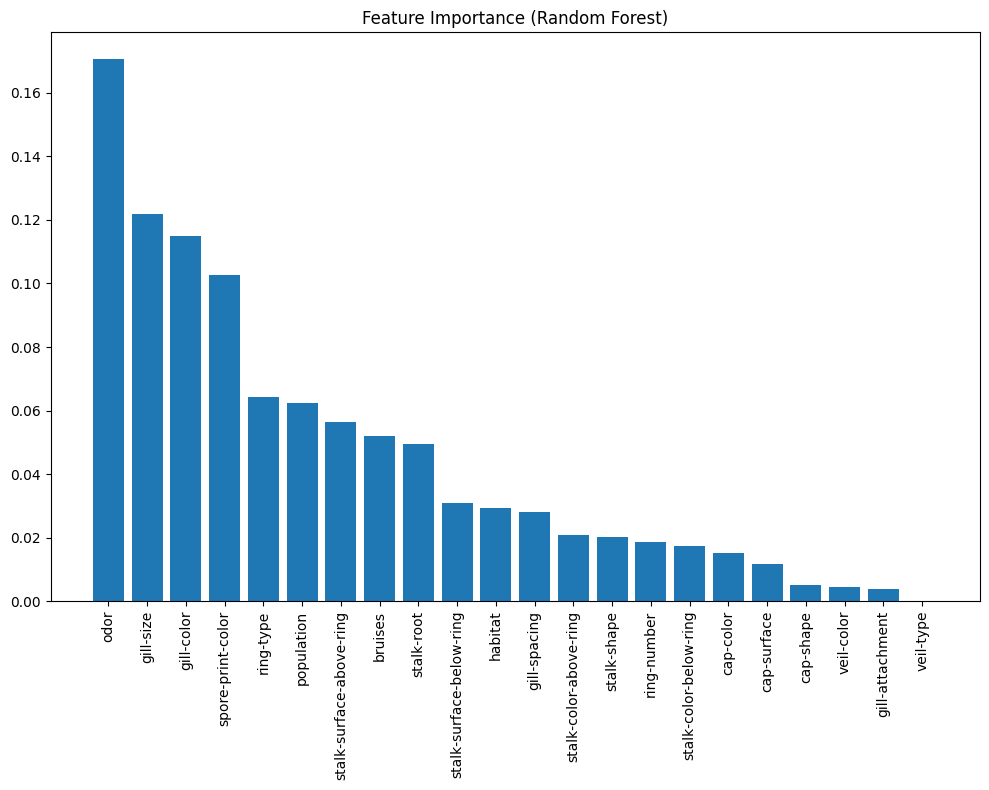

In [20]:
# تقسيم الميزات والهدف
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# تقسيم البيانات للتدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب نموذج RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# استخراج أهمية الميزات
importances = model.feature_importances_

# رسم importance plot
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 8))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [21]:
# كل الأعمدة في X هي تصنيفية
categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [22]:
# تقييم باستخدام 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# عرض النتائج
print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

Accuracy for each fold: [0.84246154 1.         1.         1.         0.75923645]
Mean accuracy: 0.9203395983327018


In [11]:
# استخراج الأهمية
importances = model.feature_importances_
feature_names = X.columns
top_n = 6  # عدد الميزات المهمة

# الحصول على أهم N أعمدة
top_features = feature_names[importances.argsort()[::-1][:top_n]]
print("Top N features:", top_features.tolist())

Top N features: ['odor', 'gill-size', 'gill-color', 'spore-print-color', 'ring-type', 'population']


In [12]:
# اختيار فقط الأعمدة المهمة من X
X_top = X[top_features]

# إعادة بناء الـ pipeline
pipeline_top = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), top_features)]
    )),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [13]:
scores_top = cross_val_score(pipeline_top, X_top, y, cv=5, scoring='accuracy')

print("Accuracy for each fold (Top N features):", scores_top)
print("Mean accuracy (Top N features):", scores_top.mean())

Accuracy for each fold (Top N features): [0.86215385 0.99630769 0.984      1.         0.96736453]
Mean accuracy (Top N features): 0.9619652140962487


In [14]:
print("📊 مقارنة:")
print("النموذج بكل الأعمدة:      ", scores.mean())
print("النموذج بـ Top N Features:", scores_top.mean())

📊 مقارنة:
النموذج بكل الأعمدة:       0.9203395983327018
النموذج بـ Top N Features: 0.9619652140962487


In [15]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": Pipeline(steps=[  # GaussianNB لا يعمل مع OneHot → نستخدم Label Encoding بدلاً
        ('label_encoder', FunctionTransformer(lambda X: X.apply(LabelEncoder().fit_transform))),
        ('clf', GaussianNB())
    ])
}
categorical_features = X.columns.tolist()

results = {}

for name, model in models.items():
    print(f"🔄 Training {name}...")

    if name == "Naive Bayes":
        pipeline_nb = model
        scores = cross_val_score(pipeline_nb, X, y, cv=5, scoring='accuracy')
    else:
        preprocessor = ColumnTransformer(
            transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)]
        )
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

    results[name] = (scores.mean(), scores.std())

# طباعة النتائج
print("\n📊 مقارنة النماذج:")
for name, (mean_acc, std) in sorted(results.items(), key=lambda x: x[1][0], reverse=True):
    print(f"{name:<20} → Accuracy: {mean_acc:.4f} ± {std:.4f}")


🔄 Training Random Forest...
🔄 Training Decision Tree...
🔄 Training Logistic Regression...
🔄 Training KNN...
🔄 Training SVM...
🔄 Training Naive Bayes...

📊 مقارنة النماذج:
Random Forest        → Accuracy: 0.9203 ± 0.1011
Decision Tree        → Accuracy: 0.9126 ± 0.1120
Logistic Regression  → Accuracy: 0.9006 ± 0.1687
KNN                  → Accuracy: 0.8988 ± 0.1382
SVM                  → Accuracy: 0.8722 ± 0.1849
Naive Bayes          → Accuracy: 0.5133 ± 0.0094
